In [1]:
from alntk.alignment import Alignment, write_to_fasta
from alntk.plotting import default_plot_style
from alntk.pca import get_pca

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_folder = '../data/'
color_cycle = default_plot_style()

# Compare additional metrics for the chosen alignment

Some of these statistics require weights to be computed. The procedure to compute these weights is detailed in [this Kaggle notebook](https://www.kaggle.com/code/shoyip/compute-weights-of-alignments) which uses the adabmDCA adabmDCA. The resulting files are `new_aln_weights.txt` and `iter_aln_weights.txt`, respectively for the `new_aln.faa` and `iter_aln.faa` alignments. Each row corresponds to each sequence, sorted in the same order. Weights have been computed with a threshold of 0.8.

## Principal Component Analysis

Number of sequences: 93695
Number of positions: 693


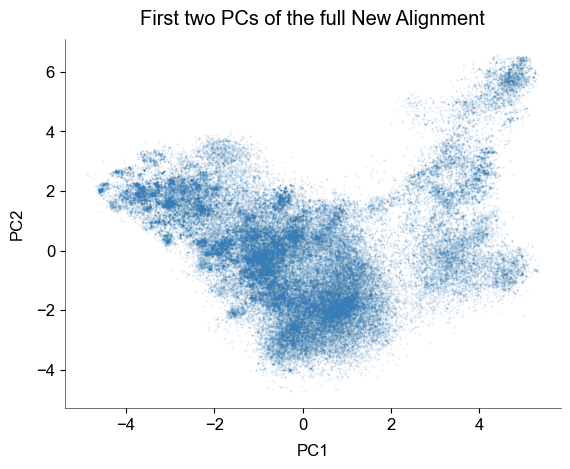

In [3]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'new_aln.faa')
aln.print_report()

get_pca(aln, 'First two PCs of the full New Alignment')
plt.show()

Number of sequences: 93695
Number of positions: 260


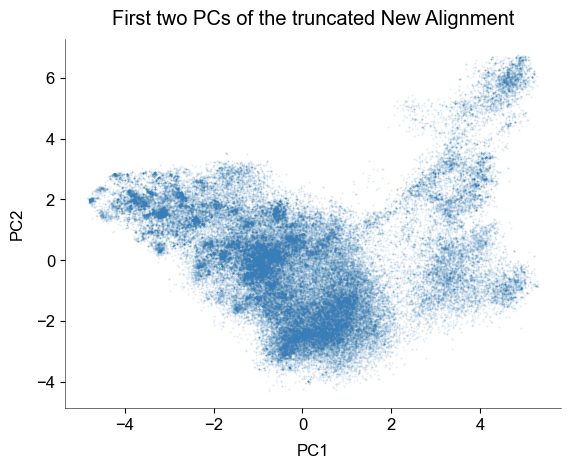

In [4]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'iter_aln.faa')
aln.print_report()

get_pca(aln, 'First two PCs of the truncated New Alignment')
plt.show()

## Number of effective sequences

In [5]:
new_aln_w = np.loadtxt(data_folder + 'new_aln_weights.txt')
iter_aln_w = np.loadtxt(data_folder + 'iter_aln_weights.txt')

In [6]:
new_aln_w.shape, iter_aln_w.shape

((93695,), (93695,))

In [7]:
np.sum(new_aln_w)

5177.101070995501

In [8]:
np.sum(iter_aln_w)

22461.99751663464

## Distribution of correlation matrix elements